# Student Grades Prediction

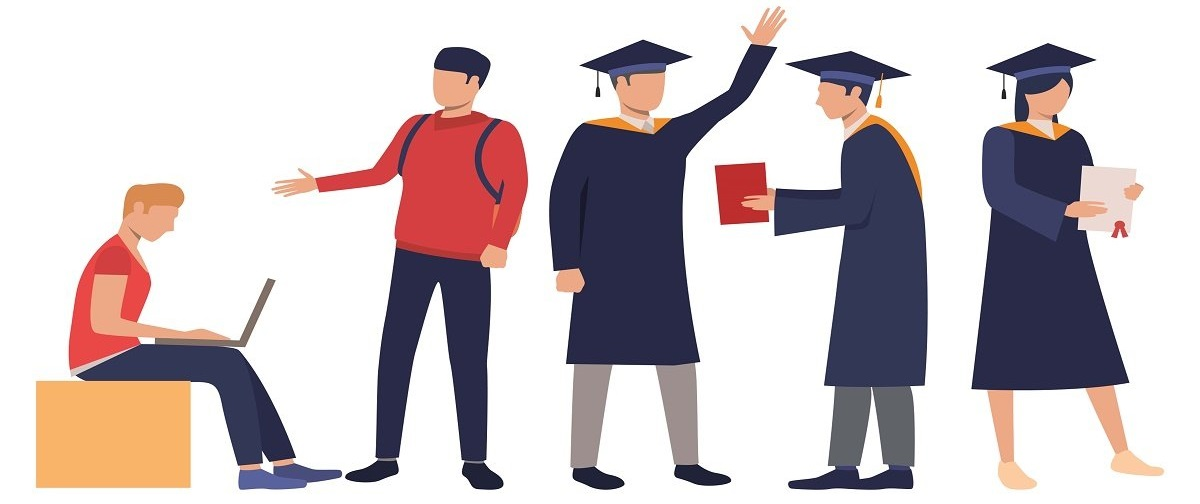

Dataset:

    The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades 



Input variables:

    * Seat number 
    * Course codes in the format AB-XXX where AB are alphabets representing candidate's departments and XXX are numbers where first X represents the year the canditate took exam
    
    
Output variable: 

    * CGPA  


Aim: 
 
    Develop a machine learning model to predict CGPA of a student based on different grades in four years (Regression model)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
grade_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
grade_df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# Data pre-processing & EDA

In [3]:
grade_df.shape

(571, 43)

In [4]:
grade_df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
grade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
for i in grade_df.columns:
    print(grade_df[i].value_counts())

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64
PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64
HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64
MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64
CS-105
A     15

In [6]:
grade_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Observation:  
There are nulls in majority of the grade columns.  
No nulls in label column (CGPA)  
In most of the subjects, majority students have achieved A and A- grades.

In [16]:
# fill nulls in grades using mode imputation as grades are categorical

from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

imputed=si.fit_transform(grade_df)

# create separate df with imputed values
grade_df1=pd.DataFrame(imputed,columns=grade_df.columns)
grade_df1

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.47
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [17]:
grade_df1.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Observation:  
    Nulls have been handled by imputation with most_frequent grades in each column.

In [18]:
unique=grade_df1.nunique()
unique.to_frame(name='Number of Unique Values')

,Number of Unique Values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


Observation:  
    There are 11-14 grades for each subject

In [19]:
# checking for duplicates
duplicates=grade_df1.duplicated()
print(f'Number of duplicates in the dataset: {duplicates.sum()}')

Number of duplicates in the dataset: 0


In [27]:
# remove seat no.
grade_df1.drop('Seat No.', axis=1,inplace=True)

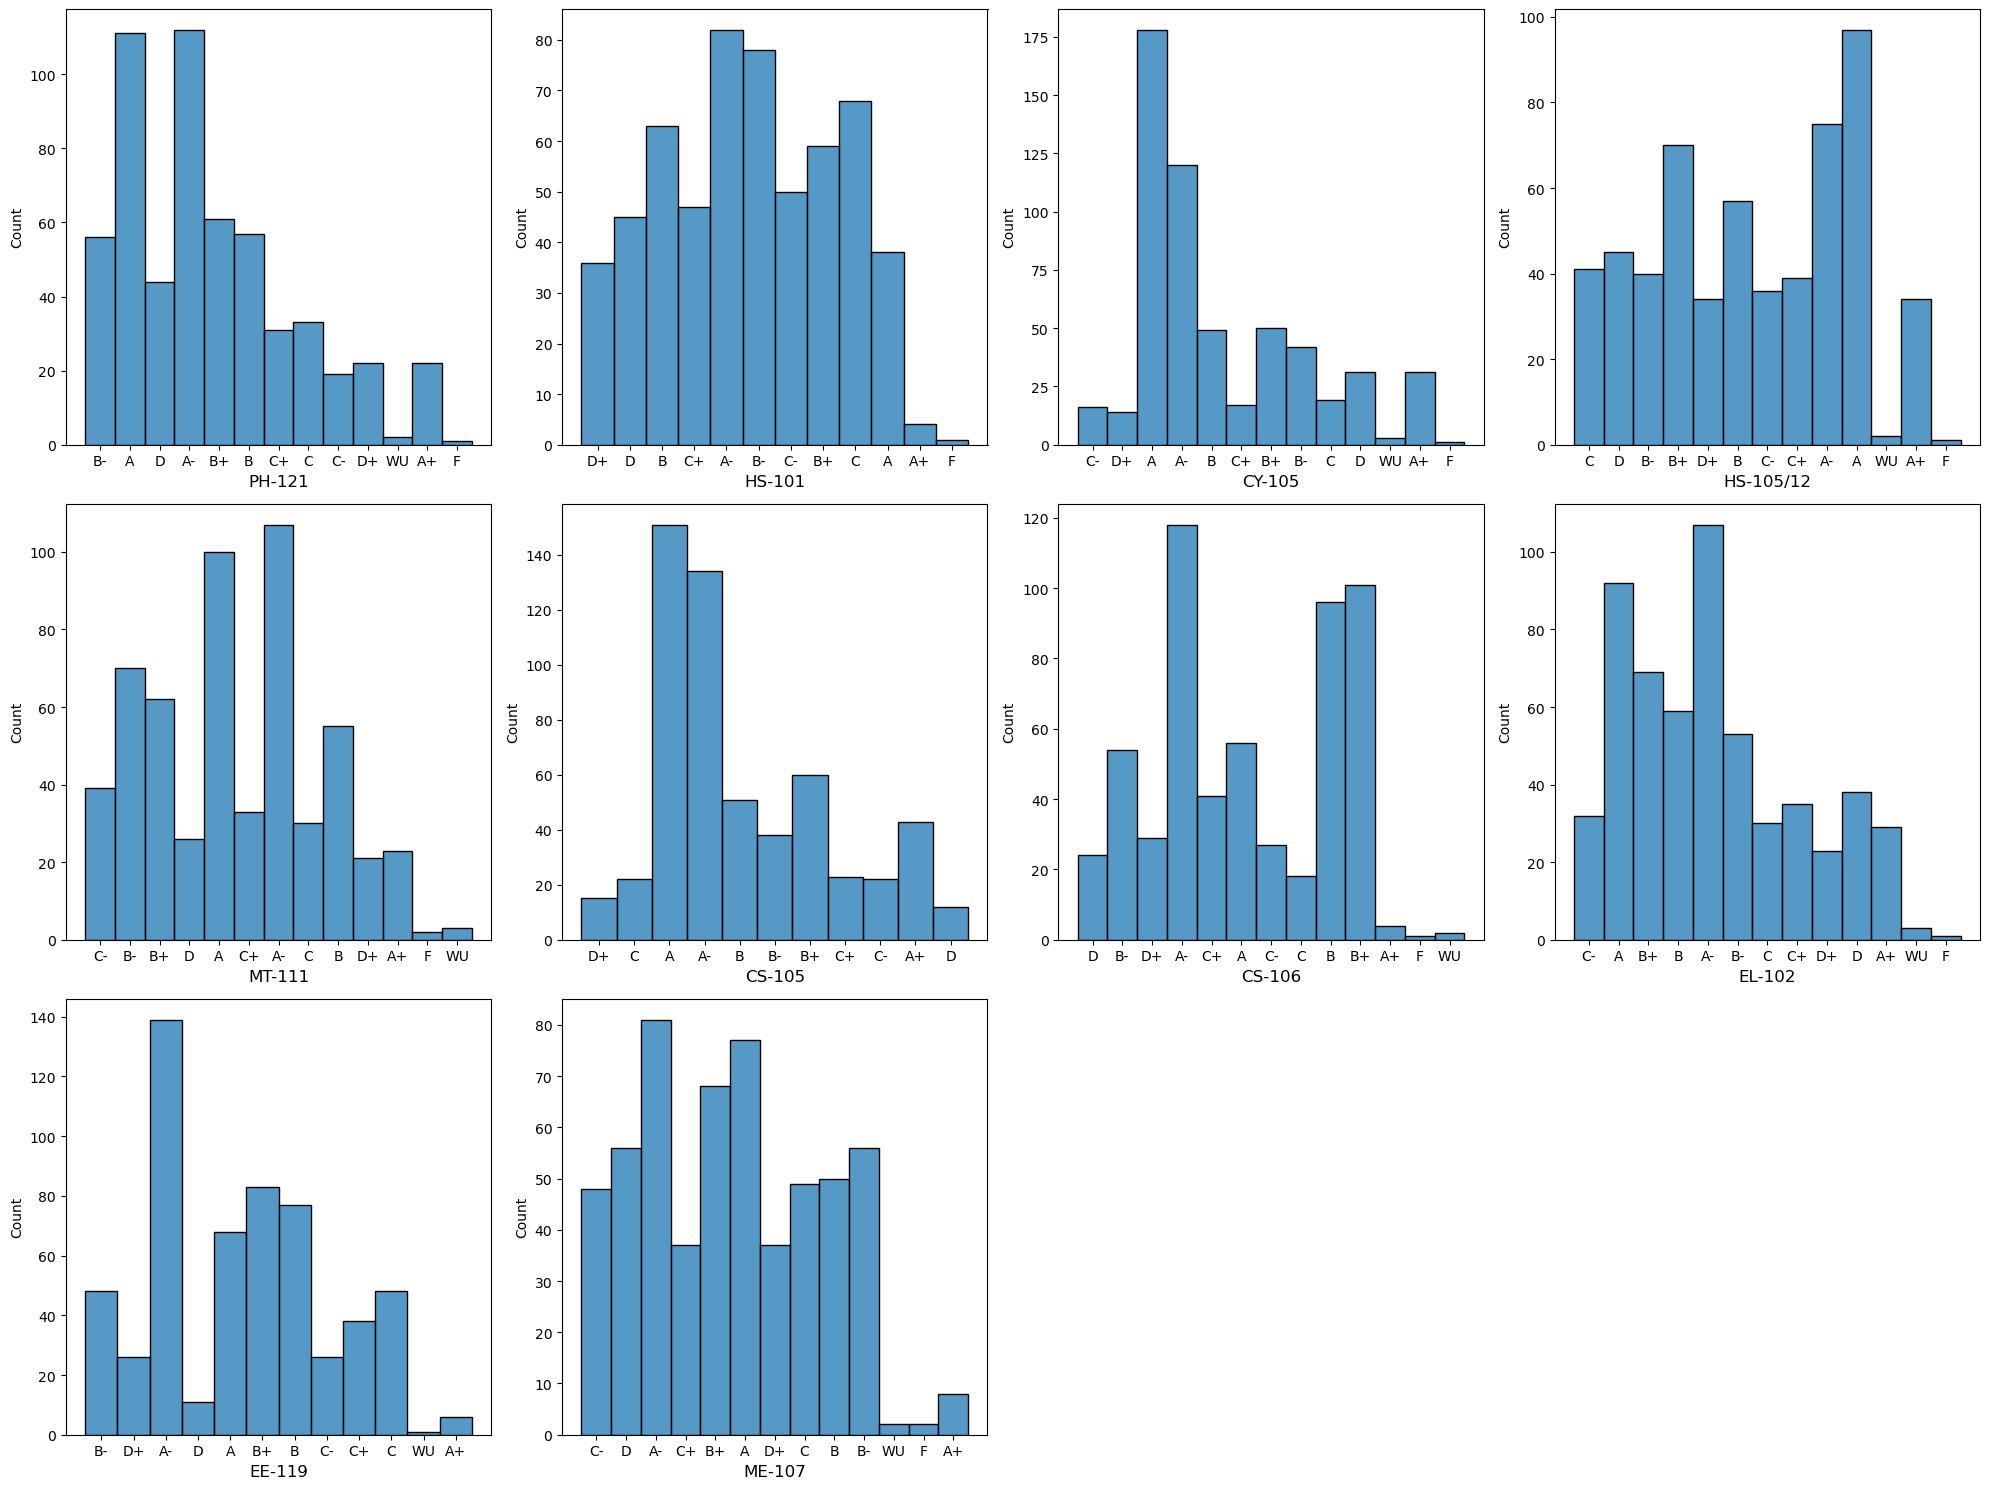

In [24]:
# check frequency of each grade value
x=grade_df1.drop(columns=['CGPA'],axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=10:
        ax=plt.subplot(3,4,plot)
        sns.histplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  
Data is almost normally distributed by analysing the histograms

In [32]:
grade_df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [51]:
# encode the data before training
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)

categorical=grade_df1.drop(columns=['CGPA'])

encoded=ohe.fit_transform(categorical)
encoded_df=pd.DataFrame(encoded)
encoded_grade_df1=pd.concat([encoded_df,grade_df1['CGPA']], axis=1)
encoded_grade_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,CGPA
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.205
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.008
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.608
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.906
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.448


In [118]:
print(encoded_grade_df1['CGPA'].dtypes)

object


In [121]:
# convert cgpa to float32 datatype
encoded_grade_df1['CGPA']=encoded_grade_df1['CGPA'].astype('float32')
print(f'Datatype of label column: {encoded_grade_df1.CGPA.dtypes}')

Datatype of label column: float32


# FEATURE SELECTION

Since CGPA (Cumulative Grade Point Average) considers all the grades for its calculation, we can select all the subjects for model training.

# MODEL BUILDING & VALIDATION

In [122]:
# splitting dataset into training and testing sets
x=encoded_grade_df1.drop('CGPA',axis=1)
y=encoded_grade_df1['CGPA']

scaler = StandardScaler()
X_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state=67)


print('x_train: ', x_train.shape,'\n','y_train: ',y_train.shape,'\n','x_test: ',x_test.shape,'\n','y_test: ',y_test.shape,'\n')

x_train:  (428, 526) 
 y_train:  (428,) 
 x_test:  (143, 526) 
 y_test:  (143,) 



In [124]:
# define functions for training and evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        print('R2 score: ',r2_score(y_test,y_pred2))

In [125]:
# linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7626781459970257


In [126]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
score(knr,x_train,y_train,x_test,y_test,train=True)
score(knr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.1899129026330385


In [127]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.5167616549224985


In [128]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7162394110196048


In [129]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
score(abr,x_train,y_train,x_test,y_test,train=True)
score(abr,x_train,y_train,x_test,y_test,train=False)


R2 score:  0.6009945516608788


In [130]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)
score(gbdt,x_train,y_train,x_test,y_test,train=True)
score(gbdt,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7793948477349533


In [131]:
# XGBoost
import xgboost as xgb
xgbr=xgb.XGBRegressor()
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8021669135228631


In [132]:
# SVM
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7824503844301514


In [133]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        mse=mean_squared_error(y_test,y_pred2)
        mae=mean_absolute_error(y_test,y_pred2)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(r2-cv)
        model_metrics.append({'Model':name, 'R2 score':r2, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='R2 score' ,ascending=False)

In [134]:
models={'Linear Regression':lr, 'KNN':knr,'Decision Tree':dtr, 'Random Forest':rfr,'AdaBoost':abr,
        'Gradient Boosting':gbdt,'XGBoost':xgbr,'SVM':svr }

evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
6,XGBoost,0.802167,0.076378,0.169012,8.322291e-01,3.006219e-02
5,Gradient Boosting,0.783425,0.083614,0.178687,8.288385e-01,4.541340e-02
7,SVM,0.782450,0.083990,0.170929,8.601180e-01,7.766758e-02
0,Linear Regression,0.762678,0.091623,0.183225,-3.474922e+21,3.474922e+21
3,Random Forest,0.720324,0.107975,0.194334,8.208571e-01,1.005330e-01
4,AdaBoost,0.635130,0.140866,0.294824,6.258006e-01,9.328969e-03
2,Decision Tree,0.462530,0.207502,0.293378,6.722904e-01,2.097605e-01
1,KNN,0.189913,0.312752,0.372719,8.582369e-01,6.683240e-01


Observation:
    XGBoost Regressor is seen as the best model among the 8 models for this regression task with:
    
       * R2 score: 0.80
       * Cross Validation: 0.83
       * MSE: 0.07
       * MAE: 0.16
       * Diff btw R2 and CV scores: 0.03

In [135]:
# Hyperparameter tuning of XGBoost Regressor model

from sklearn.model_selection import RandomizedSearchCV

params={'max_depth':range(2,8), 'min_samples_split': range(2,10), 'n_estimators': range(50,300,50),
        'learning_rate': [0.01,0.05,0.08,0.1,0.2,0.5]}

rs= RandomizedSearchCV(XGBRegressor(),param_distributions=params,cv=5,scoring='r2')
rs.fit(x_train,y_train)
print(f'Best parameters for Gradient Boosting Regressor model: {rs.best_params_} \n Best score: {rs.best_score_}')

Best parameters for Gradient Boosting Regressor model: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.2} 
 Best score: 0.8831638643810166


In [136]:
xgbr1=rs.best_estimator_
xgbr1.fit(x_train,y_train)

models={'XGBoost':xgbr,'Tuned_XGBoost': xgbr1}
evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Tuned_XGBoost,0.824381,0.067802,0.159842,0.851270,0.026890
0,XGBoost,0.802167,0.076378,0.169012,0.832229,0.030062


Observation:  
Hyperparameter tuning has improved the R2 score and cross validation score while decreased the MSE and MAE.
So we could save this tuned model.


In [137]:
# save the model
pickle.dump(xgbr1, open('Student_Grade_Prediction_xgbr1.pkl','wb'))

In [138]:
# load model and view prediction vs actual charges
Student_Grade_Prediction_model = pickle.load(open('Student_Grade_Prediction_xgbr1.pkl','rb'))
y_pred = Student_Grade_Prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted CGPA':y_pred,'Actual CGPA':y_test})
result.head()

,Predicted CGPA,Actual CGPA
396,3.452529,3.155
25,2.160958,2.228
246,3.058250,3.058
48,3.692327,3.848
443,3.238426,3.137


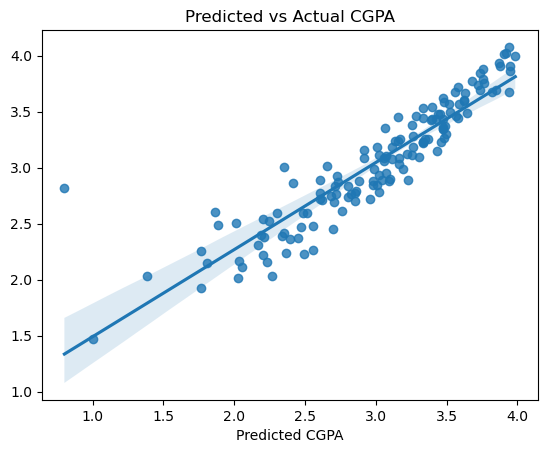

In [140]:
# plot Predicted vs Actual CGPA
sns.regplot(x=y_test,y=y_pred,data=result)
plt.title('Predicted vs Actual CGPA')
plt.xlabel('Actual CGPA')
plt.xlabel('Predicted CGPA')
plt.show()

Observation:  
The XGBoost Regressor model was able to predict CGPA closer to the actual CGPA with few exceptions as visible by the spread of datapoints outside the regression line in the regplot.

# Overall Summary

The dataset on "Students Grades" was used to analyse and build machine learning models to predict CGPA of a student based on different grades in four years.

# Data Insights

* There are 11-14 grades for each subject 
* In most of the subjects, majority students have achieved A and A- grades.
  

# Selected model

XGBoost Regressor (xgbr1) is found to be the best model among the 8 models for this regression task with:

   * R2 score: 0.824
   * Cross Validation: 0.85
   * MSE: 0.067
   * MAE: 0.159
   * Diff btw R2 and CV scores: 0.026